In [1]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

y_0 = [0, 0, 1, 1, 1, 1]
x_n = 'ore_studiu'
x_0 = np.array([1, 3, 4, 5, 6, 8])
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=10)
    µ = α + pm.math.dot(x_c, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(µ))
    bd = pm.Deterministic('bd', -α/β)
    yl = pm.Bernoulli('yl', p=θ, observed=y_0)
    idata_0 = pm.sample(1000, return_inferencedata=True)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
There were 1452 divergences after tuning. Increase `target_accept` or reparameterize.


     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
α   4.524  2.537   0.138    9.398      0.077    0.056    1097.0    1241.0   
β   5.183  2.056   1.421    8.628      0.070    0.050     856.0    1195.0   
bd -0.930  0.576  -2.020   -0.025      0.012    0.009    2039.0    2155.0   

    r_hat  
α    1.00  
β    1.01  
bd   1.00  


C:\Users\mihai\anaconda3\Lib\site-packages\arviz\plots\hdiplot.py:161: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


([<matplotlib.axis.XTick at 0x1b8c8561e80>,
 [Text(-4.0, 0, '0.5'),
  Text(-3.0, 0, '1.5'),
  Text(-2.0, 0, '2.5'),
  Text(-1.0, 0, '3.5'),
  Text(0.0, 0, '4.5'),
  Text(1.0, 0, '5.5'),
  Text(2.0, 0, '6.5'),
  Text(3.0, 0, '7.5'),
  Text(4.0, 0, '8.5')])

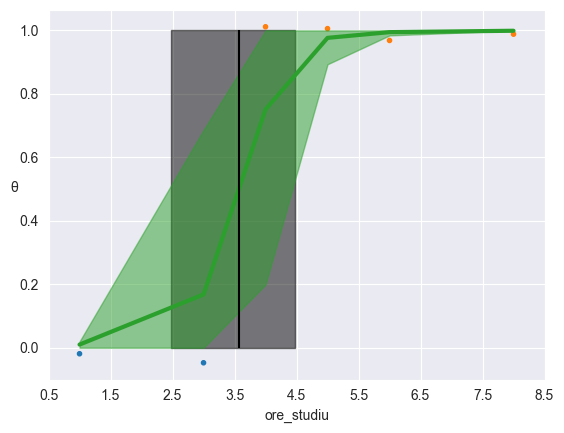

In [2]:
print(az.summary(idata_0, var_names=['α', 'β', 'bd']))

posterior_0 = idata_0.posterior.stack(samples=("chain", "draw"))
theta = posterior_0['θ'].mean("samples")
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(posterior_0['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hdi(posterior_0['bd'].values)
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)
plt.scatter(x_c, np.random.normal(y_0, 0.02),
marker='.', color=[f'C{x}' for x in y_0])
az.plot_hdi(x_c, posterior_0['θ'].T, color='C2', smooth=False)
plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1))

